# PROBLEM STATEMENT
 The Main Aim of this project is to predict the stock prices of a particular company using the stock market dataset.In this project, I am going to use LSTM networks to predict stock prices.It's important to note that there are always other factors that affect the price of stocks ,such as the political atmosphere and the market.However,we won't focus on those factors for this project.This type of problem comes under time series prediction.

# mount the google drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


# IMPORTING PACKAGES

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras

# VERSIONS

In [32]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(keras.__version__)

1.0.5
1.18.5
0.10.1
2.3.1


# IMPORTING DATASET

I have downloaded the dataset from kaggle.https://www.kaggle.com/camnugent/sandp500/download

In [4]:
df = pd.read_csv('My Drive/summer internship/all_stocks_5yr.csv')
df.shape

(619040, 7)

Dataset consists of 619040 rows and 7 columns.

In [5]:
df.Name.value_counts()

AME     1259
MSFT    1259
AEE     1259
REGN    1259
ACN     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

The column named 'Name' consists of 505 unique companies

In [6]:
data =df[df.Name=='AAP']
data.head()

,date,open,high,low,close,volume,Name
2518,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
2519,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2520,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
2521,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
2522,2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


From 505 companies I have selected a particular company called 'AAP(Advance Auto Parts)'

In [7]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

These are my columns in the dataset

In [8]:
data = data[['date','open']]
data

,date,open
2518,2013-02-08,78.34
2519,2013-02-11,78.65
2520,2013-02-12,78.39
2521,2013-02-13,78.90
2522,2013-02-14,78.66
...,...,...
3772,2018-02-01,116.24
3773,2018-02-02,115.92
3774,2018-02-05,113.05
3775,2018-02-06,108.28


I have selected two columns 'date' and 'open' to predict the future values of open column

In [9]:
data.isnull().sum()

date    0
open    0
dtype: int64

There are no null values in the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 2518 to 3776
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.5+ KB


- There are no null values in the dataset 
- And the datatypes of date and open column are object and float

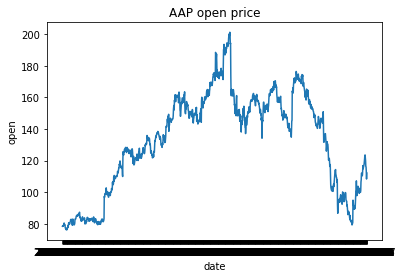

In [11]:
#line plot
plt.plot(data['date'],data['open'])
plt.title('AAP open price')
plt.xlabel('date')
plt.ylabel('open')
plt.show()

We can see uptrends and downtrends in the open price

# Create input and output


In [12]:
data.date[:10]

2518    2013-02-08
2519    2013-02-11
2520    2013-02-12
2521    2013-02-13
2522    2013-02-14
2523    2013-02-15
2524    2013-02-19
2525    2013-02-20
2526    2013-02-21
2527    2013-02-22
Name: date, dtype: object

In [13]:
## preparing the data
X = [] 
y = []
for i in range(data.shape[0]-5-1):
    X.append(data['open'][i:i+5])
    y.append(data['open'][i+2523])
print(X[:3])

[2518    78.34
2519    78.65
2520    78.39
2521    78.90
2522    78.66
Name: open, dtype: float64, 2519    78.65
2520    78.39
2521    78.90
2522    78.66
2523    78.83
Name: open, dtype: float64, 2520    78.39
2521    78.90
2522    78.66
2523    78.83
2524    79.12
Name: open, dtype: float64]


I am trying to predict the 6th day open value based on the previous 5 
days values

converting into numpy array

In [14]:
X = np.array(X)

creating a dataframe

In [15]:
df1 =pd.DataFrame(X,columns=['d1','d2','d3','d4','d5'])
df1.head()

,d1,d2,d3,d4,d5
0,78.34,78.65,78.39,78.90,78.66
1,78.65,78.39,78.90,78.66,78.83
2,78.39,78.90,78.66,78.83,79.12
3,78.90,78.66,78.83,79.12,80.42
4,78.66,78.83,79.12,80.42,79.26


predicting the  next column based on the previous columns

In [16]:
df1['d6']=y
df1.head()

,d1,d2,d3,d4,d5,d6
0,78.34,78.65,78.39,78.90,78.66,78.83
1,78.65,78.39,78.90,78.66,78.83,79.12
2,78.39,78.90,78.66,78.83,79.12,80.42
3,78.90,78.66,78.83,79.12,80.42,79.26
4,78.66,78.83,79.12,80.42,79.26,79.20


In [17]:
df1.shape

(1253, 6)

In [18]:
1253 * 0.8

1002.4000000000001

# train test split

In [19]:
## train_test_split
X_train=df1.iloc[:1002,:5]
X_test=df1.iloc[1002:,:5]
y_train=df1['d6'][:1002]
y_test=df1['d6'][1002:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1002, 5)
(251, 5)
(1002,)
(251,)


I have used 80% of the data for training and remaining 20% of the data for testing.

# scaling

In [ ]:
 I am using StandardScaler for scaling the data.

In [20]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=pd.DataFrame(sc.transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(sc.transform(X_test),columns=X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5
count,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03
mean,-6.331152e-16,7.659652e-16,5.285193e-17,-2.047597e-15,-2.261442e-16
std,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00
min,-1.896850e+00,-1.901980e+00,-1.907164e+00,-1.912368e+00,-1.917553e+00
25%,-5.752281e-01,-5.699688e-01,-5.652483e-01,-5.590802e-01,-5.359346e-01
50%,3.000091e-01,3.002195e-01,3.024915e-01,3.024348e-01,3.024373e-01
75%,7.239645e-01,7.250333e-01,7.303431e-01,7.334698e-01,7.344461e-01
max,2.058381e+00,2.058310e+00,2.058560e+00,2.058609e+00,2.058739e+00


Reshape the inputs

In [21]:
X_train_sc = X_train_sc.values.reshape(1002,5,1)#Number of records,time steps,features
X_test_sc = X_test_sc.values.reshape(251,5,1)

# Building LSTM model

- first initialize the model
- then,add the 1st LSTM layer 
- finnaly,add the output layer,the output dimension is 1 since we are predicting 1 price each time. 

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model=Sequential()
model.add(LSTM(256,input_shape=(5,1)))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


# MODEL COMPILING

In [23]:
model.compile(optimizer='adam',loss='mse')

# MODEL FITTING

In [24]:
history = model.fit(X_train_sc,y_train,epochs=150,validation_data=(X_test_sc,y_test))

Train on 1002 samples, validate on 251 samples
Epoch 1/150
1002/1002 [==============================] - 1s 1ms/step - loss: 18584.2772 - val_loss: 12377.3745
Epoch 2/150
1002/1002 [==============================] - 1s 771us/step - loss: 12985.9910 - val_loss: 7206.8485
Epoch 3/150
1002/1002 [==============================] - 1s 793us/step - loss: 10119.7174 - val_loss: 5698.2958
Epoch 4/150
1002/1002 [==============================] - 1s 813us/step - loss: 8441.3516 - val_loss: 4541.0503
Epoch 5/150
1002/1002 [==============================] - 1s 766us/step - loss: 7094.4671 - val_loss: 3622.5724
Epoch 6/150
1002/1002 [==============================] - 1s 828us/step - loss: 5980.4126 - val_loss: 2890.9599
Epoch 7/150
1002/1002 [==============================] - 1s 859us/step - loss: 5055.0852 - val_loss: 2298.3534
Epoch 8/150
1002/1002 [==============================] - 1s 830us/step - loss: 4273.6475 - val_loss: 1828.7588
Epoch 9/150
1002/1002 [==============================] - 1s 818

I have used 150 epochs,and loss value has decreased from 18630 to 14 and val_loss has decreased from 12369 to 20.

Plotting the train loss and validation loss on y-axis and epochs on x-axis.

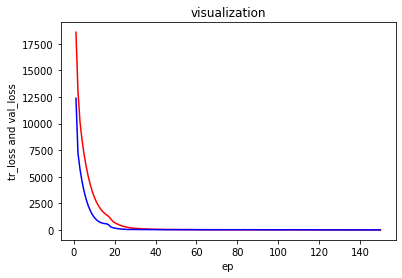

In [25]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,151))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')
plt.title('visualization')
plt.xlabel('ep')
plt.ylabel('tr_loss and val_loss')
plt.show()

# Evaluating the model with test data

In [26]:
model.predict(X_test_sc)

array([[160.38019 ],
       [160.69226 ],
       [159.99802 ],
       [160.63934 ],
       [161.38501 ],
       [163.54922 ],
       [163.96567 ],
       [163.16531 ],
       [161.74355 ],
       [162.66373 ],
       [161.91585 ],
       [160.34654 ],
       [160.05939 ],
       [157.32932 ],
       [156.20074 ],
       [155.94736 ],
       [156.20584 ],
       [156.31699 ],
       [156.48782 ],
       [155.14818 ],
       [154.5563  ],
       [153.84695 ],
       [153.96747 ],
       [153.72595 ],
       [154.05157 ],
       [153.55101 ],
       [152.82799 ],
       [152.9974  ],
       [152.52835 ],
       [152.31581 ],
       [152.12868 ],
       [151.89368 ],
       [151.32681 ],
       [150.41043 ],
       [149.45111 ],
       [148.7449  ],
       [148.38979 ],
       [148.53027 ],
       [148.91379 ],
       [148.0028  ],
       [146.66467 ],
       [145.5524  ],
       [144.14041 ],
       [143.61502 ],
       [143.30434 ],
       [143.10251 ],
       [143.08649 ],
       [142.9

# RESULT VISUALIZATION

Plotting actual and predicted values.

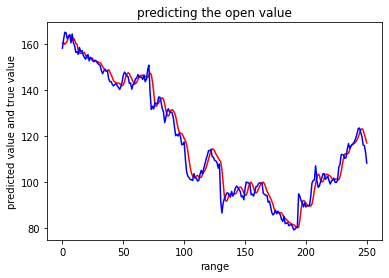

In [27]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat,color='r')#predicted values
plt.plot(range(len(X_test_sc)),y_test,color='b')#actual values
plt.title('predicting the open value')
plt.xlabel('range')
plt.ylabel('predicted value and true value')
plt.show()

From the above plot, we can say that both predicted values and actual values are same

prediction

In [33]:
model.predict(X_test_sc[0].reshape(1,5,1))

array([[160.38017]], dtype=float32)

In [29]:
y_test[1002]

158.29

# CONCLUSION
- I have not used Dropout layer,as there is no overfitting in the data.
- I have not used another model,because I got model predicted value as 160.3 and actual value as 158.29.Both the values are almost similar.
